Let's use KNN to create a model to predict class for new data based on new features

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
df=pd.read_csv(r'C:\Prabhu\Study Materials\MyProjects\KNN\Classified Data.txt')

In [33]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [34]:
#Remove first column which is a serial number

df = df.iloc[: , 1:]

In [36]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


##### Standardize the variables



As KNN model predicts the class of given observation by identifying the observations that are nearest to it, it is better to standardize the values as scale of varialbe matters.
Because large values of variables may change the distance significantly which may impact the prediction

In [12]:
from sklearn.preprocessing import StandardScaler

In [37]:
scalar = StandardScaler()

###### Fit and transform

In [38]:
scalar.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [39]:
scaled_features = scalar.transform(df.drop('TARGET CLASS',axis=1))

In [40]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [41]:
df_feat = pd.DataFrame(scaled_features,columns= df.columns[:-1])

In [42]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


###### Test Train Split

In [43]:
from sklearn.model_selection import train_test_split

In [48]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(df_feat,df['TARGET CLASS'],test_size=0.30)

###### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn.fit(X_Train,Y_Train)

KNeighborsClassifier(n_neighbors=1)

In [54]:
prediction = knn.predict(X_Test)

In [61]:
prediction != Y_Test

571     True
679    False
465    False
209    False
230    False
648    False
617    False
628    False
698    False
471    False
551    False
640    False
315    False
184    False
492    False
498    False
711    False
544    False
958    False
298    False
642    False
388    False
461    False
924    False
634    False
844    False
11     False
55     False
398    False
468    False
       ...  
101    False
680    False
630    False
583    False
451    False
387     True
495    False
775    False
600    False
81      True
660    False
894    False
176    False
147    False
539    False
438    False
504    False
32     False
797    False
882    False
416    False
392    False
122    False
279    False
805    False
900    False
269     True
293    False
588    False
19     False
Name: TARGET CLASS, Length: 300, dtype: bool

###### Evaluations

In [86]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


In [57]:
confusion_matrix(Y_Test,prediction)

array([[128,  12],
       [ 10, 150]], dtype=int64)

In [59]:
print(classification_report(Y_Test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       140
           1       0.93      0.94      0.93       160

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



###### Choosing K value

In [93]:
#We are going to find what K values suits the best. We alredy checked for k=1 and its evaluation.
error_rate=[]
accuracy_rate = []

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_Train,Y_Train)
    pred_i = knn.predict(X_Test)
    score = cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    error_rate.append(np.mean(pred_i != Y_Test))
    accuracy_rate.append(score.mean())


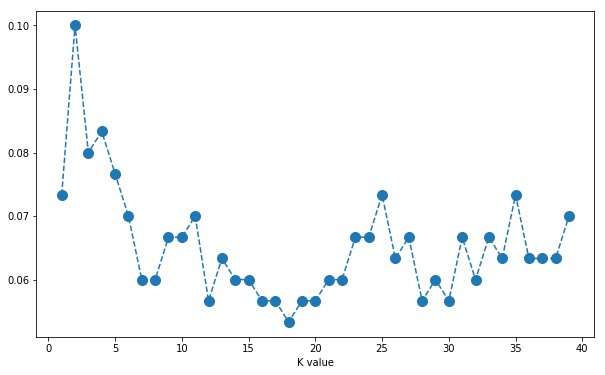

In [88]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,linestyle = 'dashed',marker = 'o',markersize = 10)
plt.xlabel('K value')
plt.ylabel=('Error Rate')

As you see, after k value of '33' , the error rate remains stable

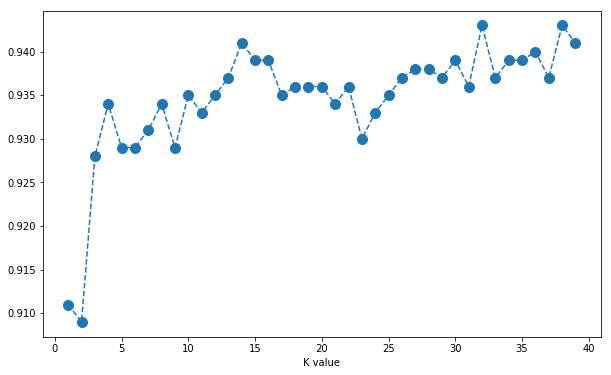

In [94]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),accuracy_rate,linestyle = 'dashed',marker = 'o',markersize = 10)
plt.xlabel('K value')
plt.ylabel=('Accuracy Rate')

As you see, after k value of '18' and '33' , the accuracy rate remains stable

Here, you can see k=18 and 33 is with less error rate and all others are above that.

In [75]:
knn =KNeighborsClassifier(n_neighbors=18)
knn.fit(X_Train,Y_Train)

KNeighborsClassifier(n_neighbors=18)

In [78]:
pred_18=knn.predict(X_Test)

In [81]:
print('With K=18')
print(confusion_matrix(Y_Test,pred_18))
print(classification_report(Y_Test,pred_18))

With K=18
[[130  10]
 [  6 154]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       140
           1       0.94      0.96      0.95       160

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [96]:
knn =KNeighborsClassifier(n_neighbors=33)
knn.fit(X_Train,Y_Train)
pred_33=knn.predict(X_Test)

In [97]:
print('With K=33')
print(confusion_matrix(Y_Test,pred_33))
print(classification_report(Y_Test,pred_33))

With K=33
[[128  12]
 [  8 152]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       140
           1       0.93      0.95      0.94       160

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

